# Task 1 - LULC tile location map

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/maxwellpatt/eds220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a simple map showing the location of the LULC tile section we used in the previous discussion section relative to the state of California and Mount Whitney. 

## About the data

In this task you will use two datsets:

**First dataset**

A small section of the GAP/LANDFIRE National Terrestrial Ecosystems data for 2011, from the US Geological Survey (USGS). This is a raster file with a 30 m x 30 m pixel resolution. Each cell in the raster has a number representing the type of land cover.

The data was pre-processed in the Microsoft Planetary Computer to show a small region around Mount Whitney in California.

Further information about the dataset can be accessed via the the dataset’s Digital Object Identifier (DOI) link:

U.S. Geological Survey (USGS) Gap Analysis Project (GAP), 2016, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey data release, https://doi.org/10.5066/F7ZS2TM0.

**Second dataset**

A shapefile of CA Geographic Boundaries. 
This is a subset of the US Census Bureau's 2016 TIGER database, which only has the state boundary.
[https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)

## File management
All your data files must be  inside a directory named 'data'  **in your gitignore**. 

## Data access
The .tif file (same as we used in discussion section) is in the Canvas-week7-homework zip file. The California shapefile will be directly accessed via its URL.

## FINAL CODE
You will use the next cell at the end of the task. Leave it blank for now.

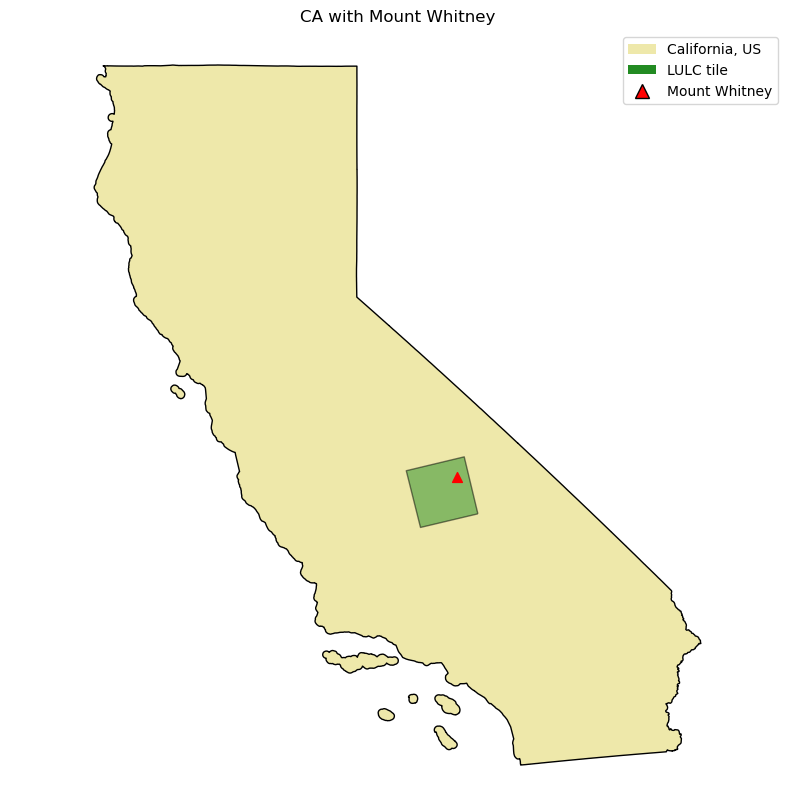

In [20]:
# import libraries and functions 
import os
import numpy as np 
import geopandas as gpd
import xarray as xr 
import rioxarray as rioxr 
from shapely import Point
from shapely.geometry import box
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from shapely import affinity
import pyproj

# construct file path for land cover raster data
data_path = os.path.join(os.getcwd(), 'data', 'land_cover.tif')

# open raster file using rioxarray
lulc = rioxr.open_rasterio(data_path)

# read in CA data 
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')

# extract bounding box
bbox_coords = lulc.rio.bounds()

# create a Shapely Polygon from bounding box coordinates
bbox_polygon = box(bbox_coords[0], bbox_coords[1], bbox_coords[2], bbox_coords[3])

# create GeoDataFrame with the bounding box
bbox = gpd.GeoDataFrame(geometry=[bbox_polygon], crs=lulc.rio.crs)

# Mount Whitney's coordinates 
mt_whitney_coords = (-118.291994, 36.578581)

# create a Point geometry
mt_whitney_point = Point(mt_whitney_coords)

# create a GeoDataFrame with the point
mt_whitney = gpd.GeoDataFrame([{'geometry': mt_whitney_point}], columns=['geometry'], crs="EPSG:4326")

# reproject CA data to ensure proper mapping 
ca = ca.to_crs(epsg=3857)

# reproject lulc to ensure proper mapping 
lulc = lulc.rio.reproject('epsg:3857')

# reproject Mount Whitney coords to ensure proper mapping 
mt_whitney = mt_whitney.to_crs(ca.crs)

# reproject bounding box to ensure proper mapping 
bbox = bbox.to_crs(ca.crs)

fig, ax = plt.subplots(figsize=(10, 10))

# plot California 
ca.plot(ax=ax, color='palegoldenrod', edgecolor = 'black', label='California, US')

# plot the LULC tile (bounding box) 
bbox.plot(ax=ax, color='forestgreen', edgecolor='black', alpha = 0.5, label='LULC tile')

# plot Mount Whitney with a red marker
mt_whitney.plot(ax=ax, color='red', marker='^', markersize=50, label='Mount Whitney')

# create custom legend entries
legend_elements = [
    Patch(facecolor='palegoldenrod', edgecolor='none', label='California, US'),
    Patch(facecolor='forestgreen', edgecolor='none', label='LULC tile'),
    Line2D([0], [0], color='none', marker='^', markerfacecolor='red', markersize=10, label='Mount Whitney')
]

# add custom legend 
ax.legend(handles=legend_elements)

# Setting title and labels with a matching font size
ax.set_title("CA with Mount Whitney", fontsize=12)
ax.set_xlabel("Longitude", fontsize=10)
ax.set_ylabel("Latitude", fontsize=10)

# adjust the aspect ratio
ax.set_aspect('equal', adjustable='datalim')

# remove axis 
ax.axis('off')

# visualize plot
plt.show()

## Import libraries and functions

In [2]:
# import libraries and functions 
import os
import numpy as np 
import geopandas as gpd
import xarray as xr 
import rioxarray as rioxr 
from shapely import Point
from shapely.geometry import box
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from shapely import affinity

## Import data
Use the next two cells to:

1. Import the raster file and store it in a variable `lulc` and take a look at it.
2. Import the CA shapefile directly from the URL using `gpd.read_file()` and take a look at it. You can get it by right-clicking on the "Download" button. Store it as a variable named `ca`.

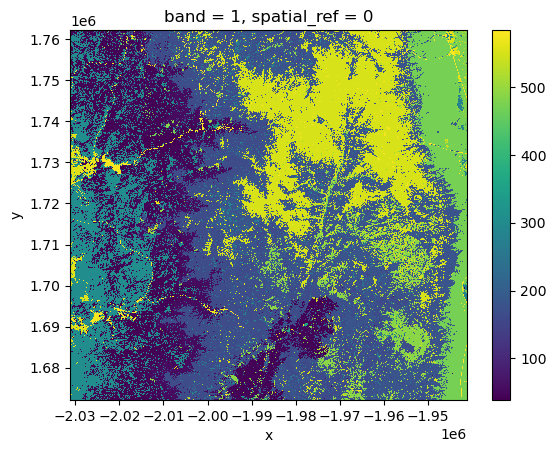

In [3]:
# construct file path for land cover raster data
data_path = os.path.join(os.getcwd(), 'data', 'land_cover.tif')

# open raster file using rioxarray
lulc = rioxr.open_rasterio(data_path)

# plot raster data for inspection
lulc.plot()

In [4]:
# read in CA data 
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')

## Bounding box
Create a `geopands.GeoDataFrame` named `bbox` with the lulc bounding box. 

<AxesSubplot:>

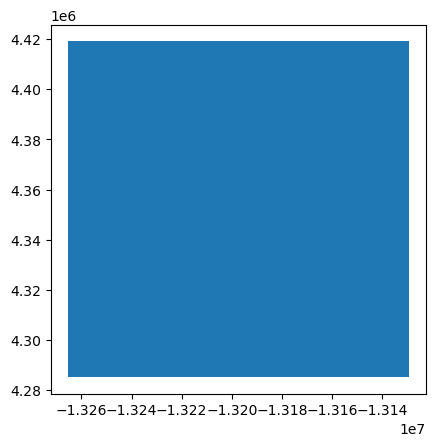

In [17]:
# extract bounding box
bbox_coords = lulc.rio.bounds()

# create a polygon from bounding box coordinates
bbox_polygon = box(bbox_coords[0], bbox_coords[1], bbox_coords[2], bbox_coords[3])

# create GeoDataFrame of the bounding box
bbox = gpd.GeoDataFrame(geometry=[bbox_polygon], crs=lulc.rio.crs)

# visualize bounding box for inspection
bbox.plot()

## Mount Whitney point
Create a `geopands.GeoDataFrame` named `mt_whitney` having the coordinates of Mount Whitney as a single point. You will need to look up Mount Whitney's coordinates. HINT: [`shapely.Point()`](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html)

In [13]:
# Mount Whitney's coordinates 
mt_whitney_coords = (-118.291994, 36.578581)

# create a Point geometry
mt_whitney_point = Point(mt_whitney_coords)

# create a GeoDataFrame with the point
mt_whitney = gpd.GeoDataFrame([{'geometry': mt_whitney_point}], columns=['geometry'], crs="EPSG:4326")

# check data point
mt_whitney.head()

,geometry
0,POINT (-118.29199 36.57858)


## Updates
If there are any updates needed to the data, perform them in the next cells (you may add as many as you need). 
At the top of each one, include a comment explaining what is happening in that cell's code.

In [18]:
# reproject CA data to ensure proper mapping 
ca = ca.to_crs(epsg=3857)
print(ca.crs)

# reproject lulc to ensure proper mapping 
lulc = lulc.rio.reproject(ca.crs)
print(lulc.rio.crs)

# reproject Mount Whitney coords to ensure proper mapping 
mt_whitney = mt_whitney.to_crs(ca.crs)
print(mt_whitney.crs)

# reproject bounding box to ensure proper mapping 
bbox = bbox.to_crs(ca.crs)
print(bbox.crs)

epsg:3857
EPSG:3857
epsg:3857
epsg:3857


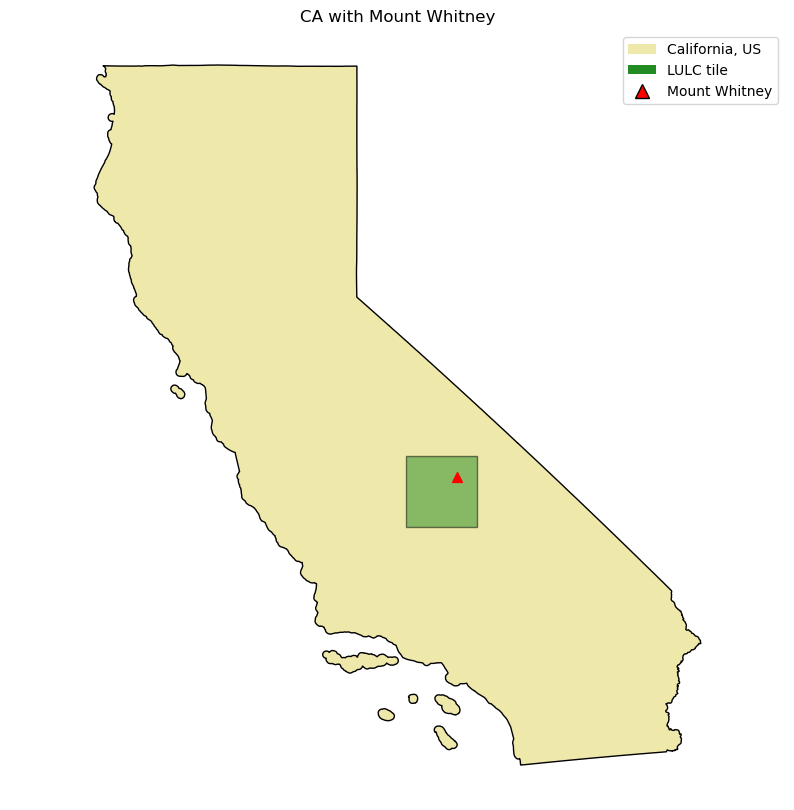

In [19]:
# establish plot
fig, ax = plt.subplots(figsize=(10, 10))

# plot California 
ca.plot(ax=ax, color='palegoldenrod', edgecolor = 'black', label='California, US')

# plot the LULC tile (bounding box) 
bbox.plot(ax=ax, color='forestgreen', edgecolor='black', alpha = 0.5, label='LULC tile')

# plot Mount Whitney with a red marker
mt_whitney.plot(ax=ax, color='red', marker='^', markersize=50, label='Mount Whitney')

# create custom legend entries
legend_elements = [
    Patch(facecolor='palegoldenrod', edgecolor='none', label='California, US'),
    Patch(facecolor='forestgreen', edgecolor='none', label='LULC tile'),
    Line2D([0], [0], color='none', marker='^', markerfacecolor='red', markersize=10, label='Mount Whitney')
]

# add custom legend 
ax.legend(handles=legend_elements)

# Setting title and labels with a matching font size
ax.set_title("CA with Mount Whitney", fontsize=12)
ax.set_xlabel("Longitude", fontsize=10)
ax.set_ylabel("Latitude", fontsize=10)

# adjust the aspect ratio
ax.set_aspect('equal', adjustable='datalim')

# remove axis 
ax.axis('off')

# visualize plot
plt.show()

## Final code
Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.
